In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/master/data/jj.csv', parse_dates=['date'])
train = df[:-4]
test = df[-4:]

/tmp/ipykernel_759/3449879940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = train['data'].mean()
/tmp/ipykernel_759/3449879940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_year_mean'] = train['data'].iloc[-4:].mean()
/tmp/ipykernel_759/3449879940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

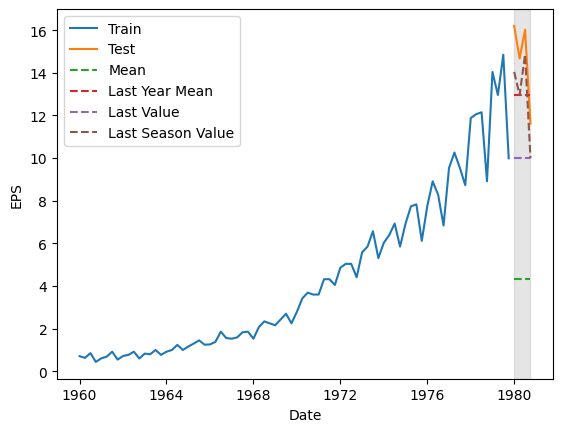

In [92]:
test.loc[:, 'pred_mean'] = train['data'].mean()
test.loc[:, 'pred_last_year_mean'] = train['data'].iloc[-4:].mean()
test.loc[:, 'pred_last'] = train['data'].iloc[-1]
test.loc[:, 'pred_last_season'] = train['data'].iloc[-4:].values

plt.xlabel('Date')
plt.ylabel('EPS')
plt.plot(train['date'], train['data'], label='Train')
plt.plot(test['date'], test['data'], label='Test')
plt.plot(test['date'], test['pred_mean'], ls='dashed', label='Mean')
plt.plot(test['date'], test['pred_last_year_mean'], ls='dashed', label='Last Year Mean')
plt.plot(test['date'], test['pred_last'], ls='dashed', label='Last Value')
plt.plot(test['date'], test['pred_last_season'], ls='dashed', label='Last Season Value')
plt.axvspan(test['date'].iloc[0], test['date'].iloc[-1], alpha=0.2, color='gray')

plt.legend()

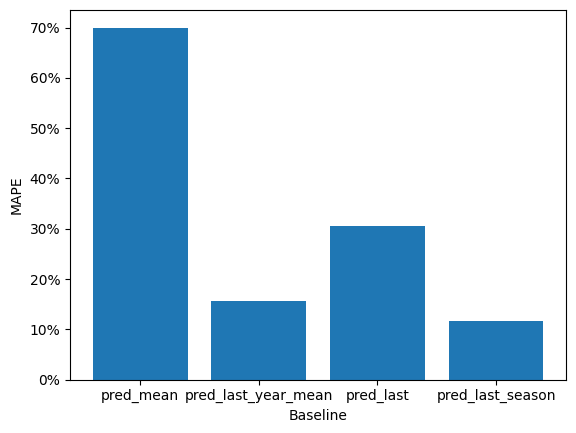

In [93]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))

xs = ['pred_mean', 'pred_last_year_mean', 'pred_last', 'pred_last_season']
ys = [mape(test['data'], test[x]) for x in xs]

plt.bar(xs, ys)
plt.xlabel('Baseline')
plt.ylabel('MAPE')
# set y value to percentage
plt.gca().yaxis.set_major_formatter(lambda y, _: '{:.0%}'.format(y))